In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df =  pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_rides_df = pd.merge(city_df, ride_df)

# Display the data table for preview
city_rides_df.head(10)

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850
5,Richardfort,38,Urban,2018-04-21 03:44:04,9.54,3698147103219
6,Richardfort,38,Urban,2018-02-03 00:14:26,29.04,4982665519010
7,Richardfort,38,Urban,2018-02-08 15:50:12,16.55,2270463070874
8,Richardfort,38,Urban,2018-04-03 15:07:34,40.77,9496210735824
9,Richardfort,38,Urban,2018-02-19 14:09:20,27.11,8690324801449


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [38]:
# Obtain the x and y coordinates for each of the three city types
# x = total number of rides
# y = average fares
# area = driver count per city
# first group by city to consolidate data points

group_df = city_rides_df.groupby(['city','type'])
# Aggregate it
aggregated_df = group_df.agg({'fare': 'mean', 'ride_id': 'count','driver_count': 'mean'})
# Reset index (only type)
summary_df = aggregated_df.reset_index(level=1)
summary_df.head()

,type,fare,ride_id,driver_count
city,,,,
Amandaburgh,Urban,24.641667,18,12
Barajasview,Urban,25.332273,22,26
Barronchester,Suburban,36.422500,16,11
Bethanyland,Suburban,32.956111,18,22
Bradshawfurt,Rural,40.064000,10,7


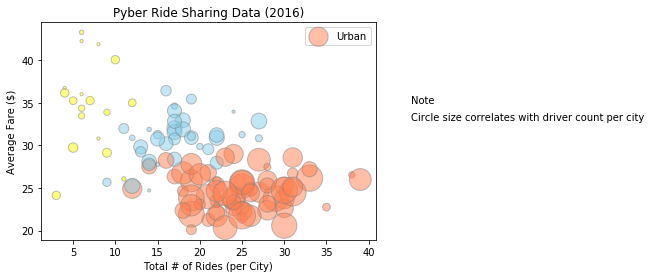

In [100]:
area = summary_df["driver_count"]*10
y = summary_df["fare"]
x = summary_df["ride_id"]
color = summary_df["type"]

# Build the scatter plots for each city types
label_color = ['coral' if i=="Urban" else 'yellow' if i=="Rural" else 'skyblue' for i in color]

plt.scatter(x, y, s=area, c=label_color, alpha=0.5, edgecolors='grey')

plt.legend(color)
# Incorporate the other graph properties

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total # of Rides (per City)")
plt.ylabel("Average Fare ($)")
plt.text(45,35,'Note')
plt.text(45,33,'Circle size correlates with driver count per city')
# Create a legend

# Incorporate a text label regarding circle size

# Save Figure
plt.savefig("FaresScatter.png")

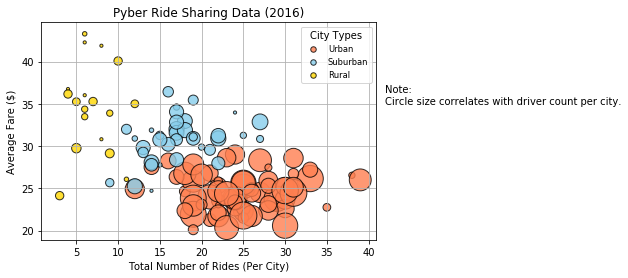

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

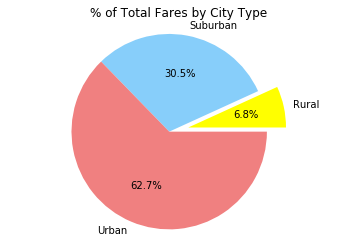

In [99]:
# Calculate Type Percents
grouped_fare = city_rides_df.groupby('type').sum()
grouped_fare.head()
# Build Pie Chart

# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = grouped_fare["fare"]

# The colors of each section of the pie chart
colors = ["yellow", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.2, 0, 0)
          
plt.pie(sizes, colors = colors, labels = labels, explode=explode,
        autopct="%1.1f%%", shadow=False, startangle=0)     

plt.axis("equal")
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("PercentFares.png")

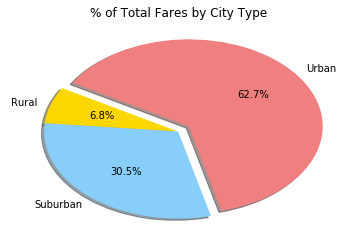

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

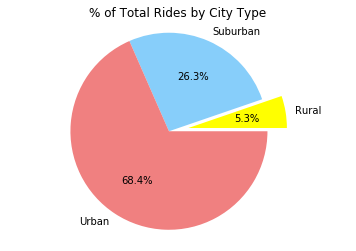

In [98]:
# Calculate Ride Percents
grouped_rides = city_rides_df.groupby('type').count()
grouped_rides.head()
# Build Pie Chart

# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = grouped_rides["ride_id"]

# The colors of each section of the pie chart
colors = ["yellow", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.2, 0, 0)
          
plt.pie(sizes, colors = colors, labels = labels, explode=explode,
        autopct="%1.1f%%", shadow=False, startangle=0)     

plt.axis("equal")
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("PercentRides.png")

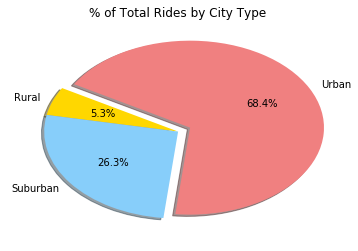

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

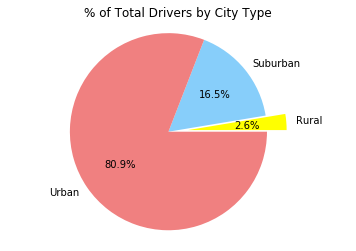

In [97]:
# Calculate Driver Percents
grouped_drivers = summary_df.groupby('type').sum()
grouped_drivers.head()
# Build Pie Chart

# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = grouped_drivers["driver_count"]

# The colors of each section of the pie chart
colors = ["yellow", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.2, 0, 0)
          
plt.pie(sizes, colors = colors, labels = labels, explode=explode,
        autopct="%1.1f%%", shadow=False, startangle=0)     

plt.axis("equal")
plt.title("% of Total Drivers by City Type")

plt.savefig("PercentDrivers.png")

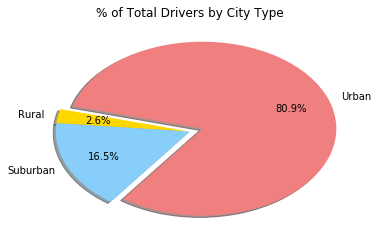

In [6]:
# Show Figure
plt.show()

In [105]:
#Observations

#1. Urban has the majority of drivers, fares, and rides, with Rural poorly represented.
#2. Most likely due to scarcity, Rural areas have the highest average fare $. This trend could also be due to distance
#covered by rural trips might be longer than shorter trips in Urban areas. 
#3. Urban markets have the highest volume, but potentially most competition with major players Uber and Lyft. Additional market
#research may be needed to determine opportunity in rural and suburban markets. These markets may have demographics less prone to
#using technology such as app to hail a ride. By charging a premium to ensure profitability, this market may be easier to break
#into. 
#4. For rural markets, understanding factors for why someone may want to use a ridesharing service instead of their own vehicle
#important. For Urban areas, it is potential related to three major factors: a)desire to avoid parking fees or finding parking
#b)does not own a car, and c) avoiding driving while intoxicated if heading to a bar. Are the reasons the same in suburban and rural?